In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../../dataset/superstore_dataset2011-2015.csv')
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


## Información básica

In [3]:
df.shape

(51291, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51291 entries, 0 to 51290
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51291 non-null  int64  
 1   Order ID        51291 non-null  object 
 2   Order Date      51291 non-null  object 
 3   Ship Date       51291 non-null  object 
 4   Ship Mode       51291 non-null  object 
 5   Customer ID     51291 non-null  object 
 6   Customer Name   51291 non-null  object 
 7   Segment         51291 non-null  object 
 8   City            51291 non-null  object 
 9   State           51291 non-null  object 
 10  Country         51291 non-null  object 
 11  Postal Code     9995 non-null   float64
 12  Market          51291 non-null  object 
 13  Region          51291 non-null  object 
 14  Product ID      51291 non-null  object 
 15  Category        51291 non-null  object 
 16  Sub-Category    51291 non-null  object 
 17  Product Name    51291 non-null 

In [5]:
df['Sales'].describe(include='all')
## df.describe(include='all)

count    51291.000000
mean       246.485834
std        487.561793
min          0.444000
25%         30.750000
50%         85.050000
75%        251.038800
max      22638.480000
Name: Sales, dtype: float64

## Valores nulos

In [6]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
## df = df.drop('Postal Code', axis=1) es lo mismo que...
df.drop('Postal Code', axis=1, inplace=True)

## Análisis univariante

### Iterar sobre las columnas numéricas

In [8]:
## Columnas numéricas
df.select_dtypes(include=np.number)

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,42433,408.300,2,0.0,106.1400,35.46
1,22253,120.366,3,0.1,36.0360,9.72
2,48883,66.120,4,0.0,29.6400,8.17
3,11731,44.865,3,0.5,-26.0550,4.82
4,22255,113.670,5,0.1,37.7700,4.70
...,...,...,...,...,...,...
51286,47594,3.990,1,0.0,0.4200,0.49
51287,8857,26.400,3,0.0,12.3600,0.35
51288,6852,7.120,1,0.0,0.5600,0.20
51289,36388,3.024,3,0.2,-0.6048,0.17


In [9]:
df.select_dtypes(include=np.number).columns.to_list()

['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

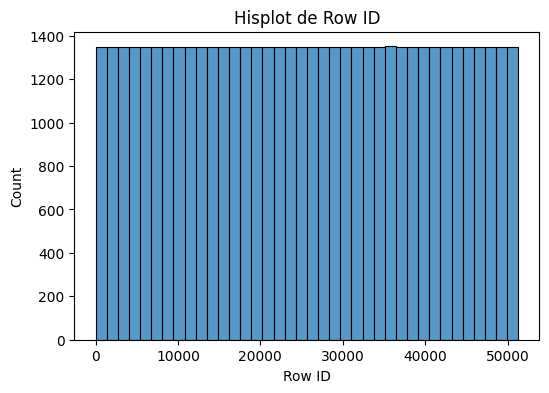

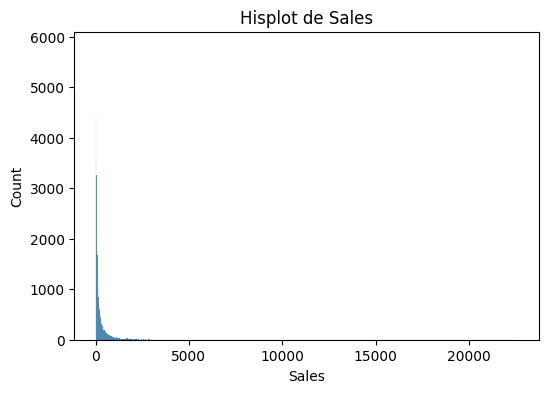

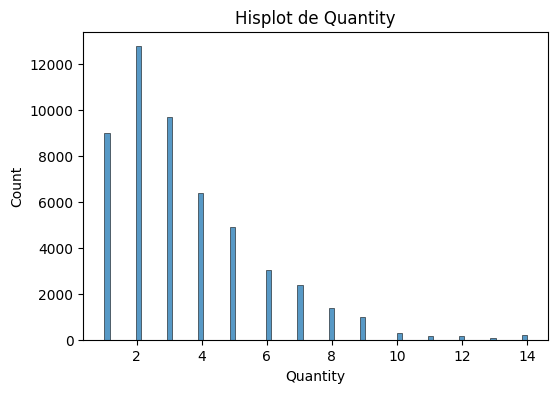

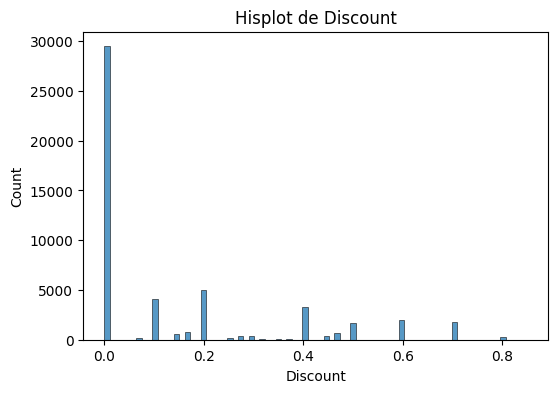

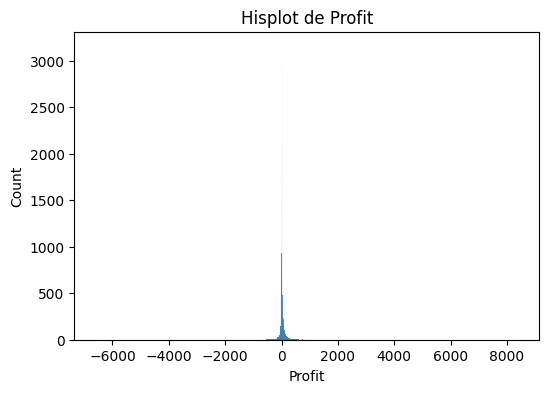

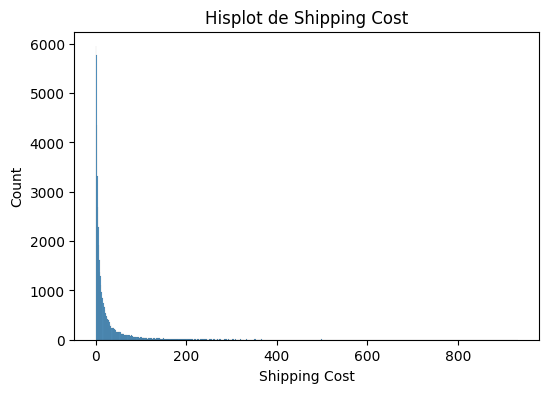

In [10]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()

for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f"Hisplot de {column}")
    plt.show

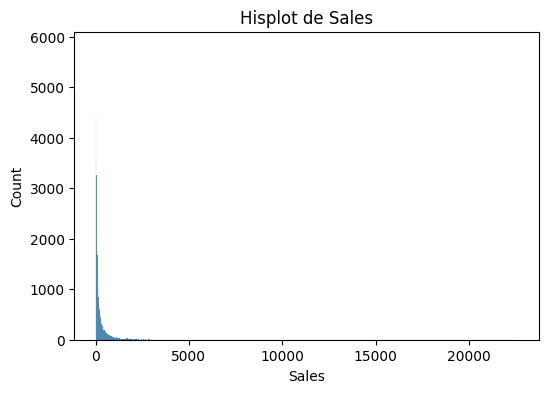

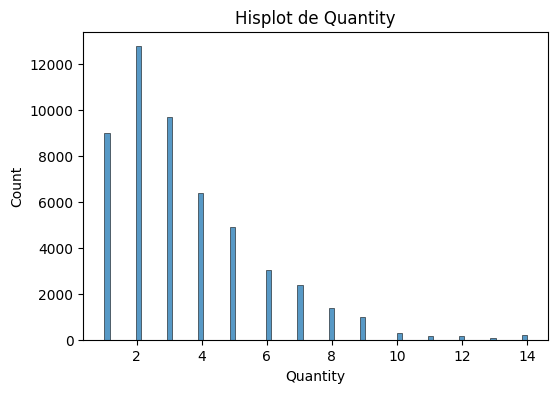

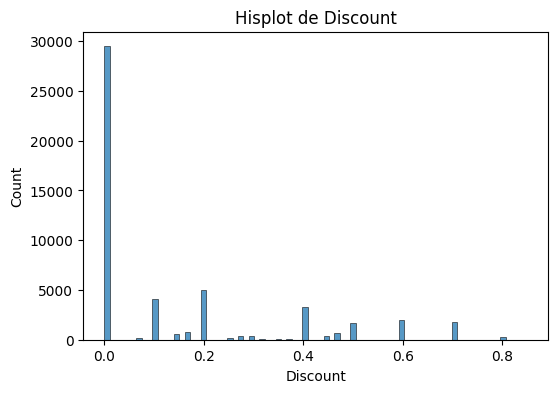

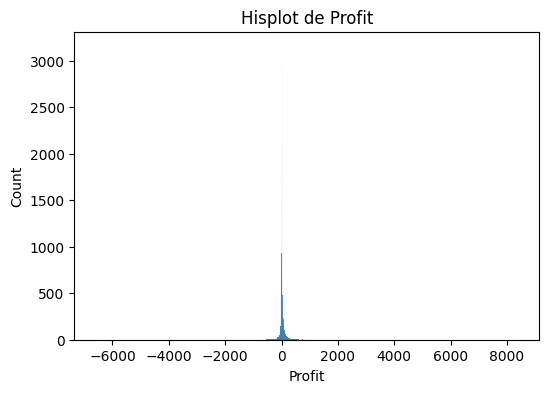

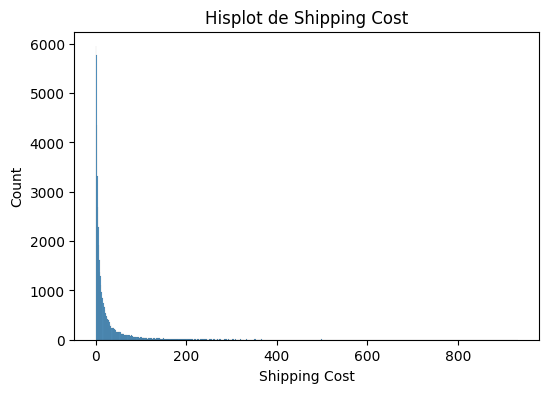

In [11]:
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f"Hisplot de {column}")
    plt.show

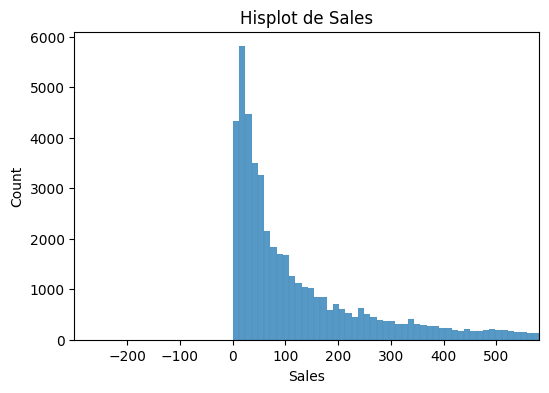

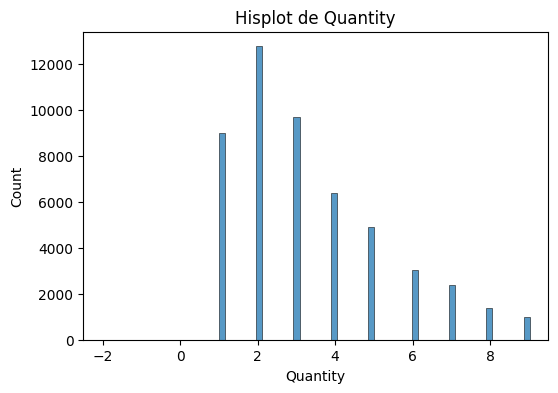

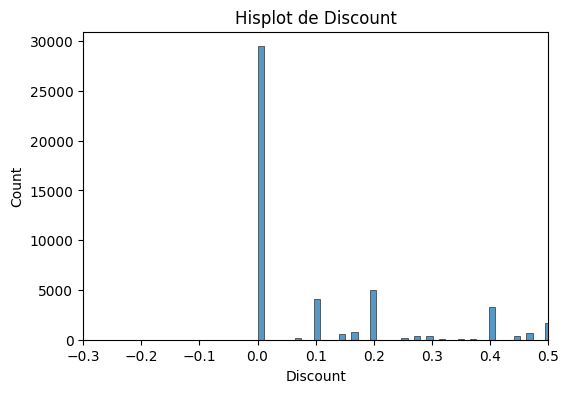

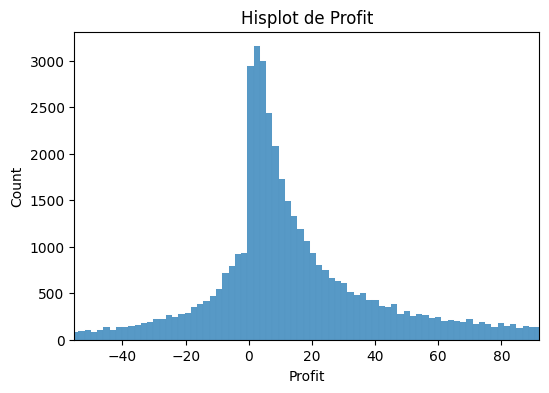

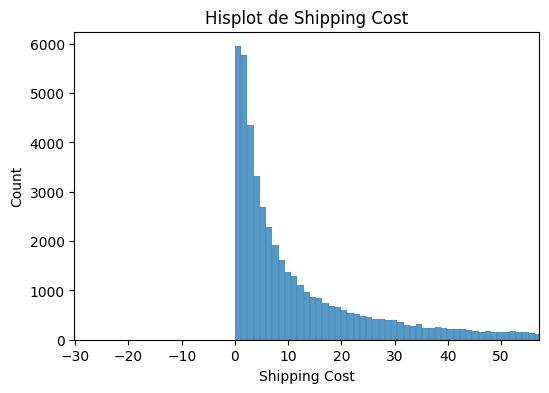

In [12]:
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f"Hisplot de {column}")
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    plt.xlim(lower_limit,upper_limit)
    
    plt.show

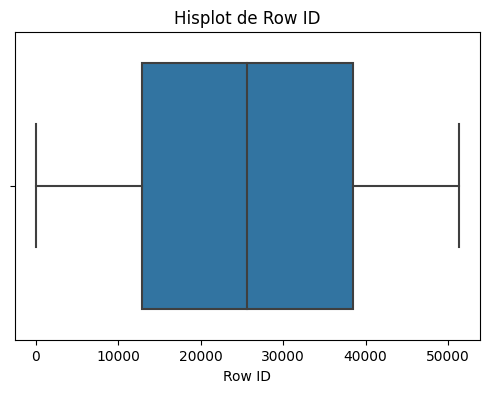

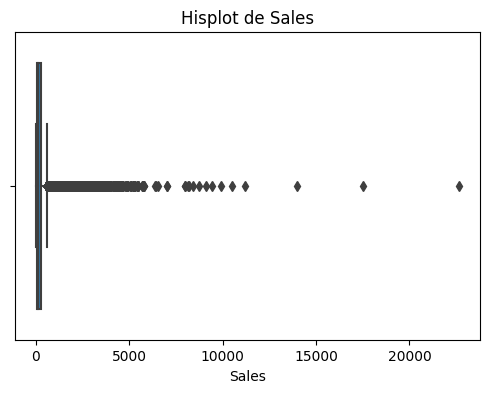

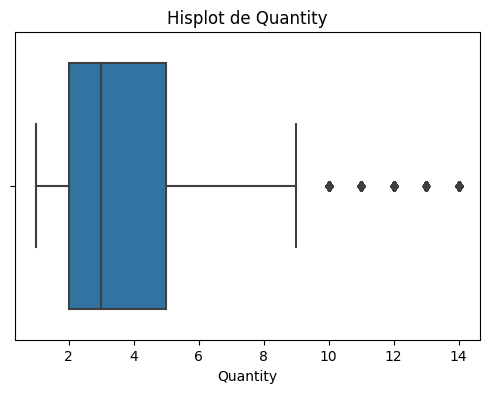

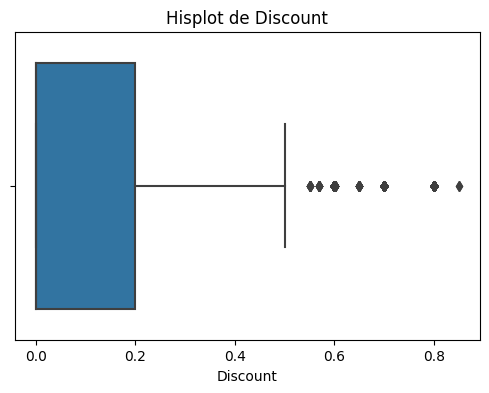

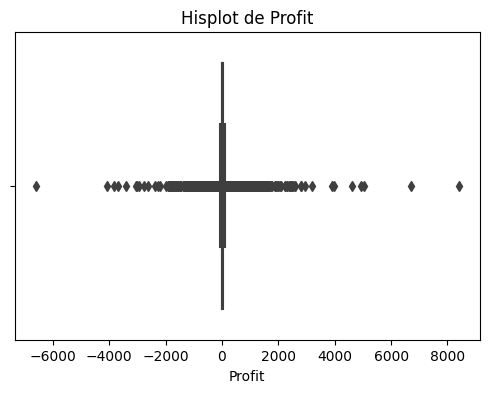

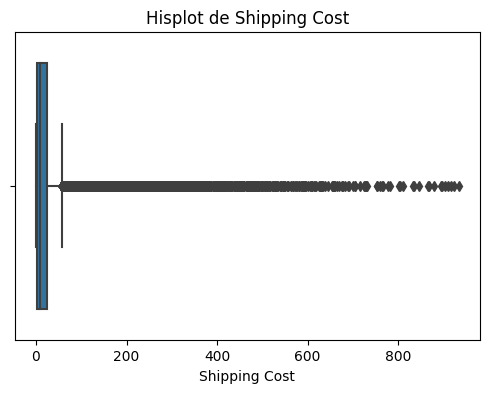

In [13]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()

for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=column)
    plt.title(f"Hisplot de {column}")
    plt.show

### Boxplot

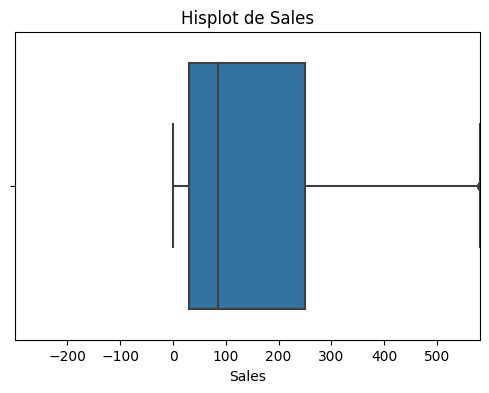

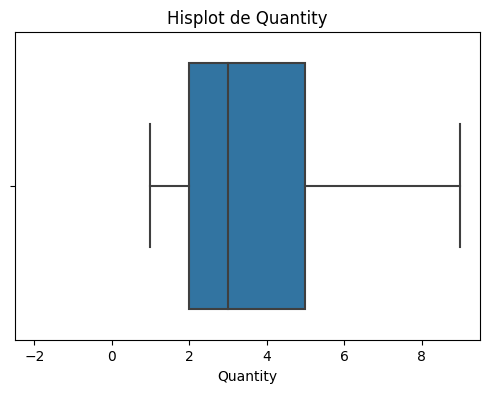

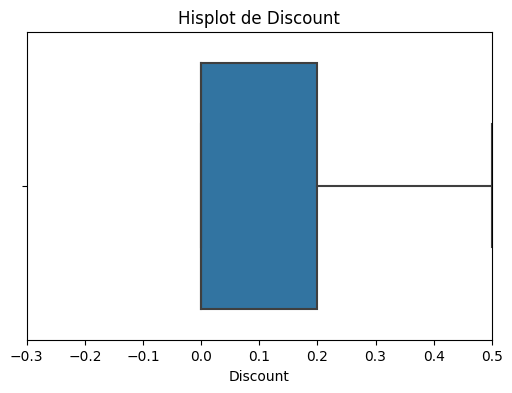

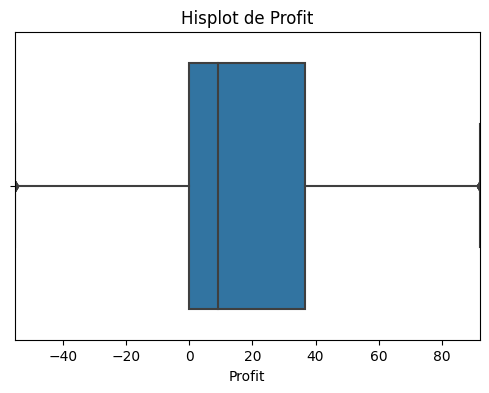

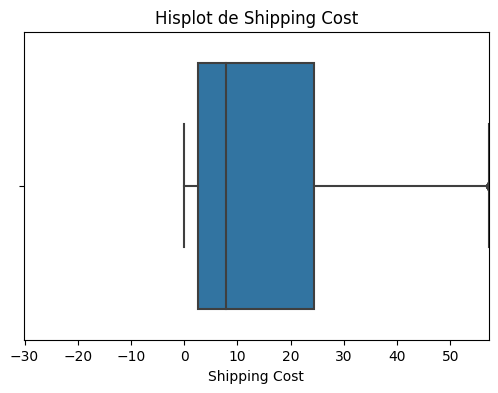

In [14]:
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=column)
    plt.title(f"Hisplot de {column}")
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    plt.xlim(lower_limit,upper_limit)
    
    plt.show

### Tipo categórico (texto)

In [15]:
df.select_dtypes(include='object').columns.to_list()

['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Order Priority']

In [16]:
df['Category']. nunique() ## Saca el valor nuérico de una columna

3

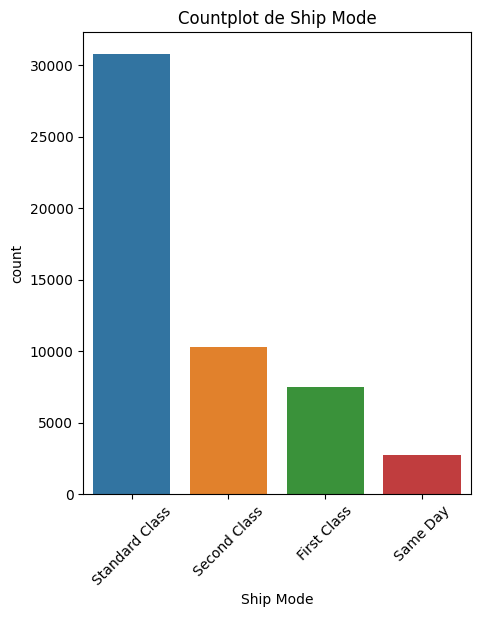

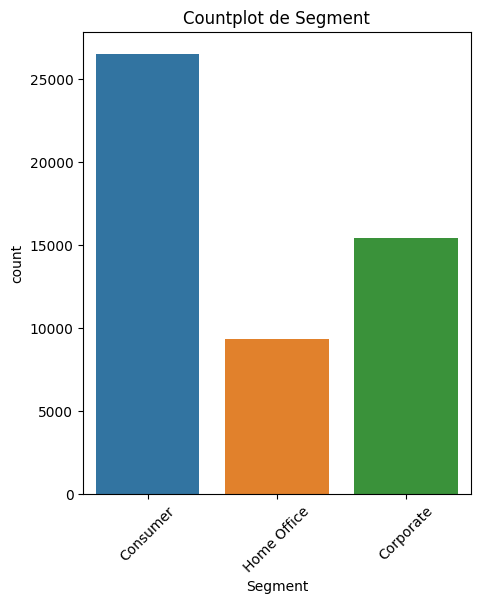

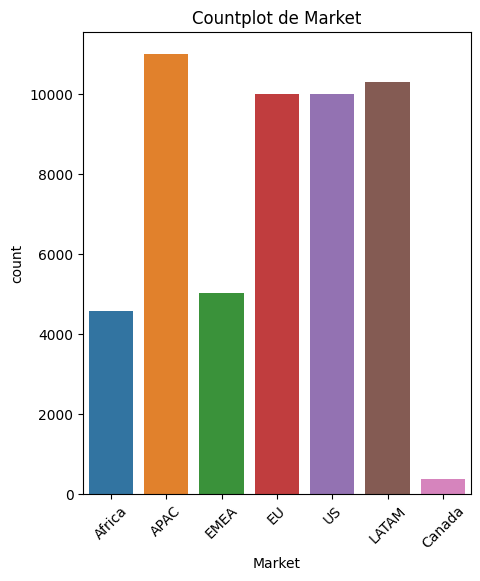

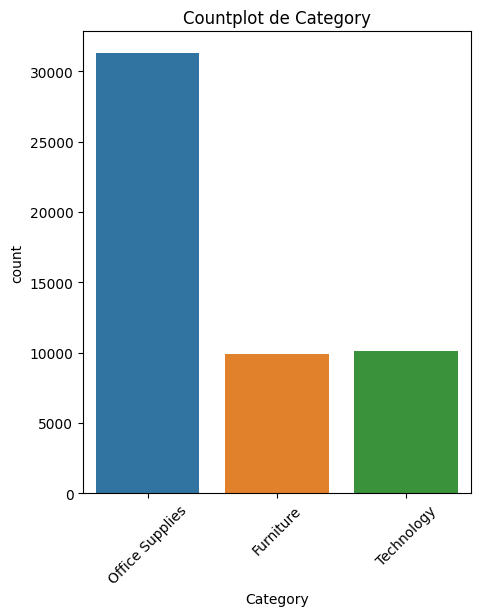

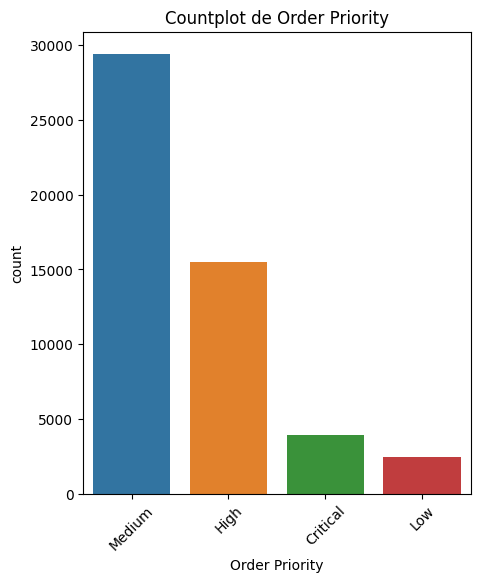

In [17]:
categorical_columns = df.select_dtypes(include='object').columns.to_list()

for column in categorical_columns:
    if df[column].nunique() < 10:
        plt.figure(figsize=(5,6))
        sns.countplot(data=df, x=column)
        plt.title('Countplot de ' + column)
        plt.xticks(rotation=45)
        plt.show()
        
    

### Análisis bivariante

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=False)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=False)

C:\Users\bardo\AppData\Local\Temp\ipykernel_15156\697252003.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=False)
C:\Users\bardo\AppData\Local\Temp\ipykernel_15156\697252003.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=False)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51291 entries, 0 to 51290
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51291 non-null  int64         
 1   Order ID        51291 non-null  object        
 2   Order Date      51291 non-null  datetime64[ns]
 3   Ship Date       51291 non-null  datetime64[ns]
 4   Ship Mode       51291 non-null  object        
 5   Customer ID     51291 non-null  object        
 6   Customer Name   51291 non-null  object        
 7   Segment         51291 non-null  object        
 8   City            51291 non-null  object        
 9   State           51291 non-null  object        
 10  Country         51291 non-null  object        
 11  Market          51291 non-null  object        
 12  Region          51291 non-null  object        
 13  Product ID      51291 non-null  object        
 14  Category        51291 non-null  object        
 15  Su

In [20]:
df.select_dtypes(include='datetime64').columns.to_list()

['Order Date', 'Ship Date']

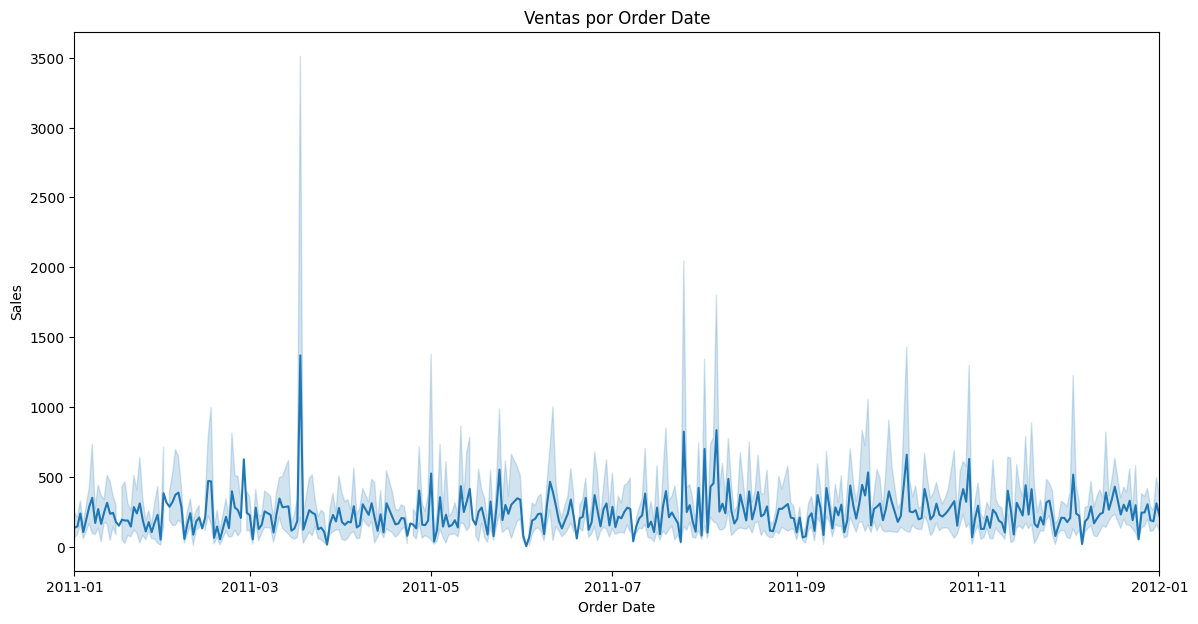

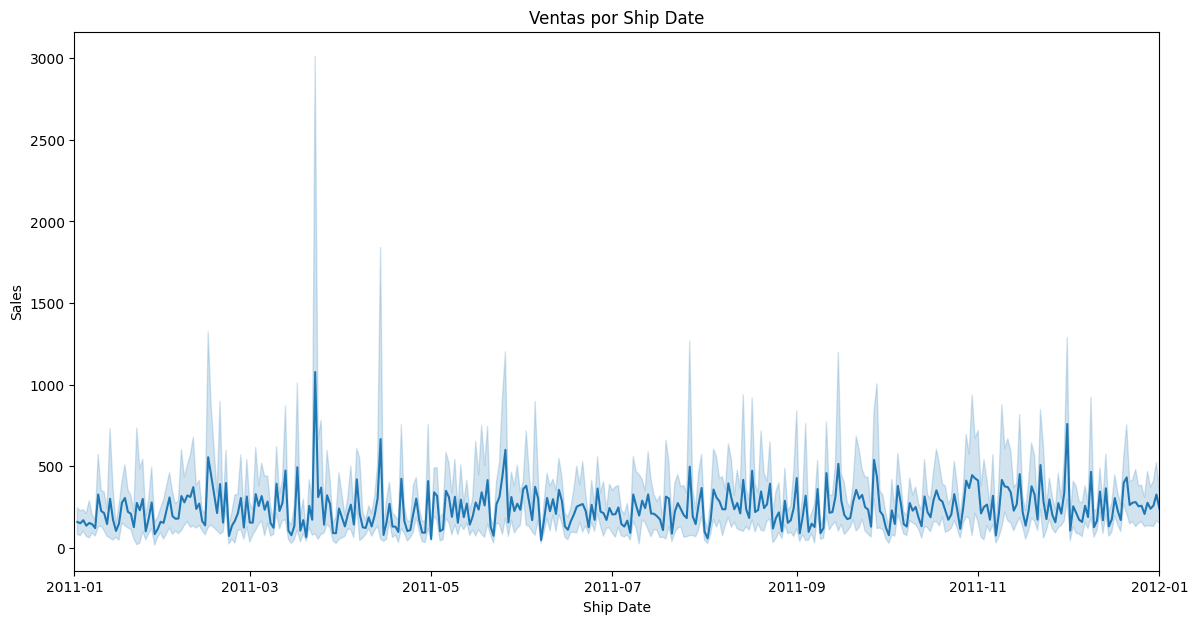

In [21]:
date_colums = df.select_dtypes(include='datetime64').columns.to_list()
for column in date_colums:
    plt.figure(figsize=(14,7))
    sns.lineplot(data=df, x=column, y='Sales')
    # df[column]['2011-01-01' ; '2012-01-01'].plot() ##Necesario índice
    plt.title('Ventas por ' + column)
    plt.xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2012-01-01'))
    plt.show()

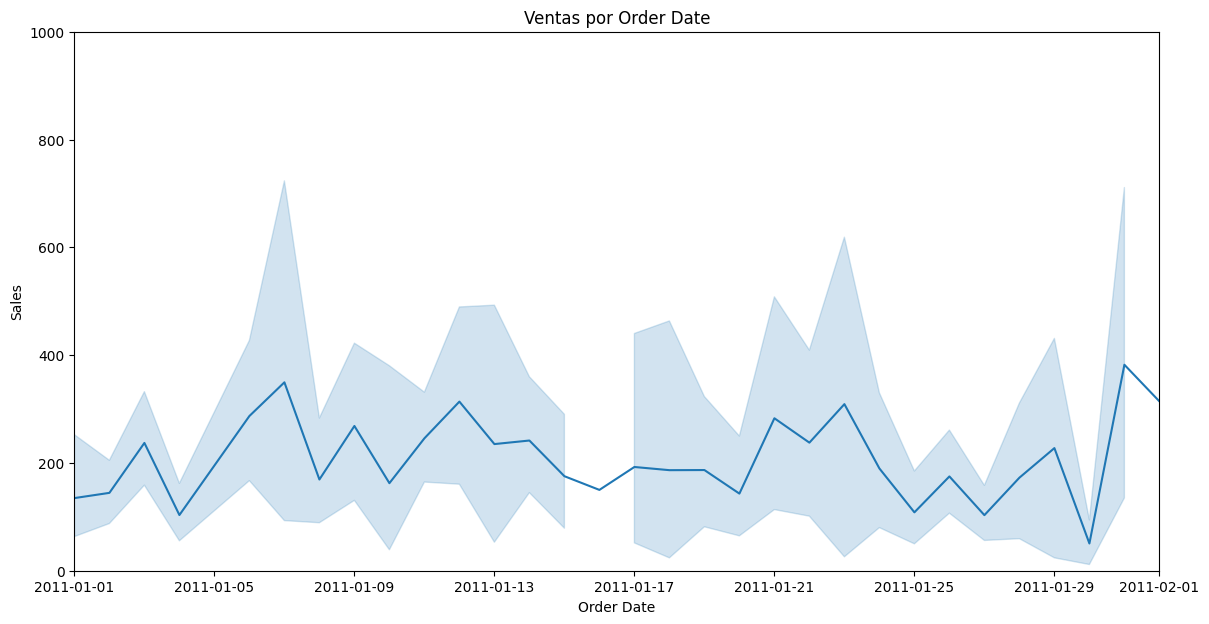

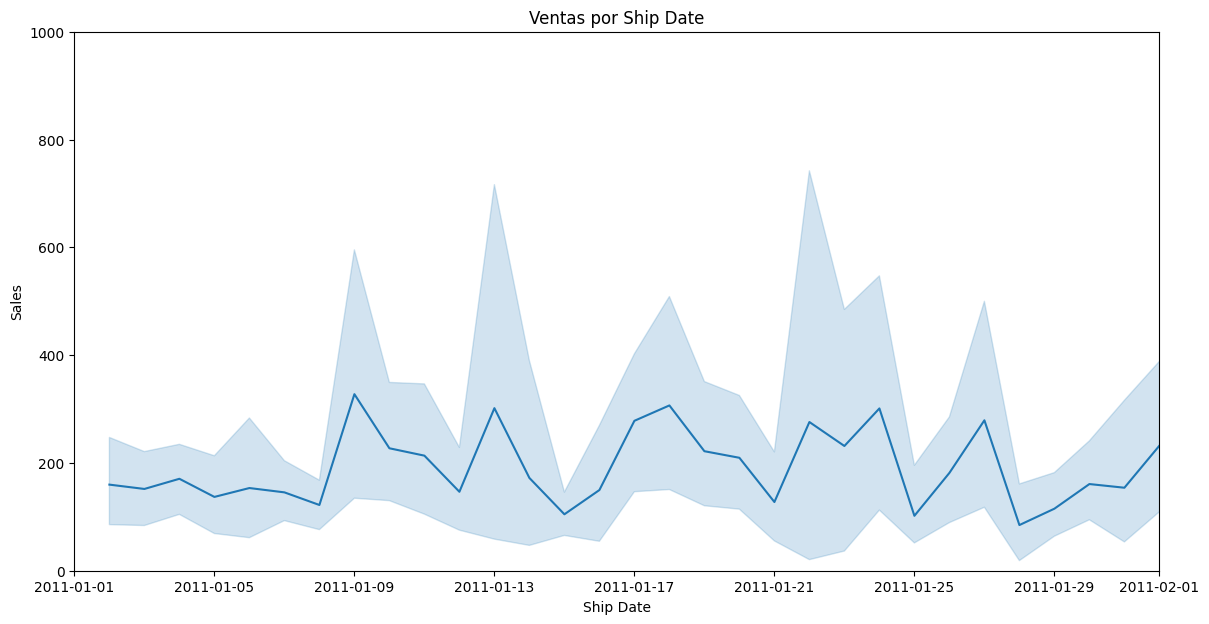

In [22]:
date_colums = df.select_dtypes(include='datetime64').columns.to_list()
for column in date_colums:
    plt.figure(figsize=(14,7))
    sns.lineplot(data=df, x=column, y='Sales')
    plt.title('Ventas por ' + column)
    plt.xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2011-02-01'))
    plt.ylim(0, 1000)
    plt.show()

In [23]:
## Ventas agrupadas por número de semana
df_orderdate = df.copy()
df_orderdate.set_index('Order Date', inplace=True)
df_weekly_sales = df_orderdate.resample('w')['Sales'].sum()
df_weekly_profit = df_orderdate.resample('w')['Profit'].sum()
df_weekly_sales

Order Date
2011-01-02      3264.23300
2011-01-09     44493.75150
2011-01-16     45704.56598
2011-01-23     21799.13634
2011-01-30     15337.02860
                  ...     
2014-12-07     51829.39626
2014-12-14     98005.72702
2014-12-21     99450.13210
2014-12-28    123273.28474
2015-01-04     55201.88188
Freq: W-SUN, Name: Sales, Length: 210, dtype: float64

<Axes: xlabel='Order Date'>

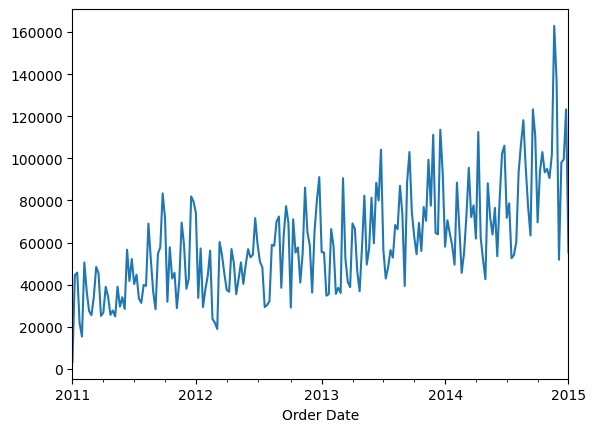

In [24]:
df_weekly_sales.plot()

<Axes: xlabel='Order Date'>

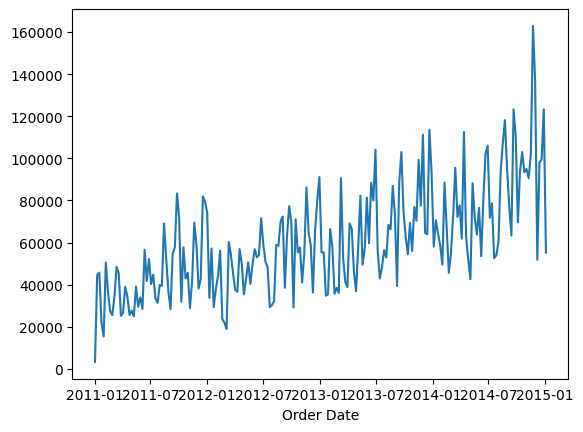

In [25]:
## Saca el mismo gráfico con Seaborn
sns.lineplot(x=df_weekly_sales.index, y=df_weekly_sales.values)

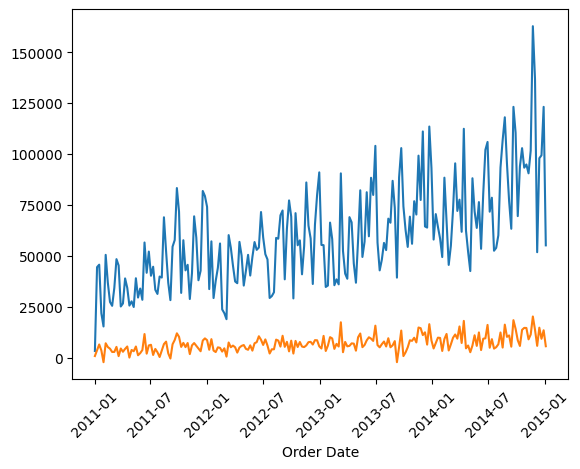

In [26]:
sns.lineplot(x=df_weekly_sales.index, y=df_weekly_sales.values)
sns.lineplot(x=df_weekly_profit.index, y=df_weekly_profit.values)
plt.xticks(rotation=45);

In [27]:
## Ventas agrupadas por mes
df_ordenate = df.copy()
df_ordenate.set_index('Order Date', inplace=True)
df_monthly_sales = df_orderdate.resample('M')['Sales'].sum()
df_monthly_profit = df_orderdate.resample('M')['Profit'].sum()
df_monthly_sales


Order Date
2011-01-31    138241.30042
2011-02-28    134969.94086
2011-03-31    171455.59372
2011-04-30    128833.47034
2011-05-31    148146.72092
2011-06-30    189338.43966
2011-07-31    162034.69756
2011-08-31    219223.49524
2011-09-30    255237.89698
2011-10-31    204675.07846
2011-11-30    214934.29386
2011-12-31    292359.96752
2012-01-31    162800.89338
2012-02-29    152661.15144
2012-03-31    201608.72784
2012-04-30    187469.96192
2012-05-31    218960.16042
2012-06-30    249289.77172
2012-07-31    174394.02808
2012-08-31    271669.66086
2012-09-30    256567.85308
2012-10-31    239321.09904
2012-11-30    270723.05356
2012-12-31    291972.33306
2013-01-31    206459.19582
2013-02-28    191062.77216
2013-03-31    230547.79468
2013-04-30    233181.34844
2013-05-31    304509.96336
2013-06-30    341162.34370
2013-07-31    223642.65664
2013-08-31    323876.60716
2013-09-30    326897.27044
2013-10-31    270121.87570
2013-11-30    383039.21248
2013-12-31    371245.40880
2014-01-31    268

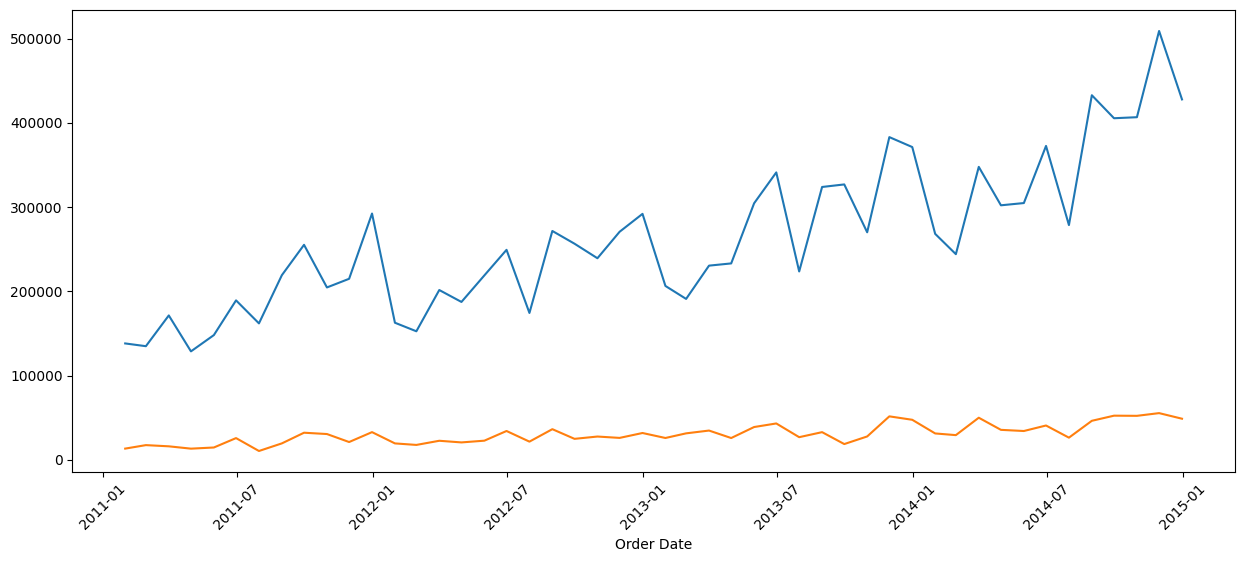

In [28]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=df_monthly_sales.index, y=df_monthly_sales.values)
sns.lineplot(x=df_monthly_profit.index, y=df_monthly_profit.values)
plt.xticks(rotation=45);


### barplot: Sales/Profit tolales por año
2011-2015

In [29]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


<Axes: xlabel='Sales'>

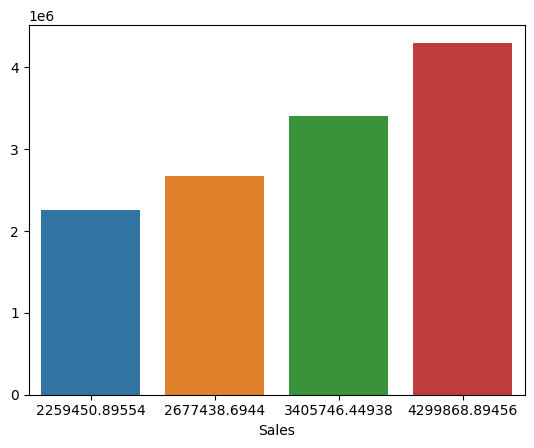

In [35]:
# Crear columna Year
df = pd.read_csv('../../dataset/superstore_dataset2011-2015.csv')
# groupby de Sales por Year
# barplot
#df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixted')
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['year'] = df['Order Date'].dt.year

sales_per_year = df.groupby('year')['Sales'].sum()
profit_per_year = df.groupby('year')['Profit'].sum()

sns.barplot( x=sales_per_year, y=sales_per_year.values)



### area de sales_per_year y profit_per_year

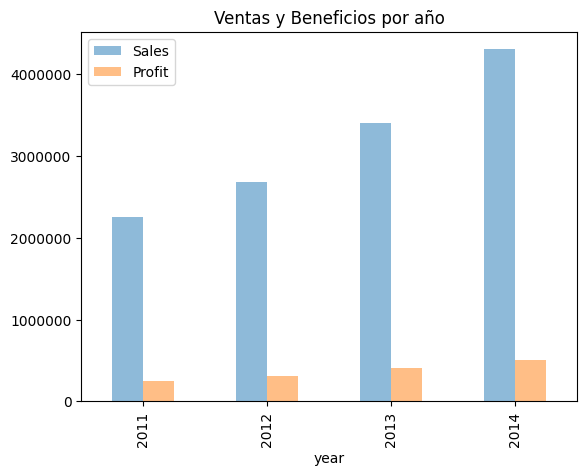

In [50]:
df_sales_per_year = pd.DataFrame({
    'Sales': sales_per_year.values,
    'Profit':profit_per_year.values
}, index=sales_per_year.index)

df_sales_per_year.plot(kind='bar', alpha=0.5)
plt.title('Ventas y Beneficios por año')
plt.ticklabel_format(style='plain', axis='y') #Desactiva anotación científica



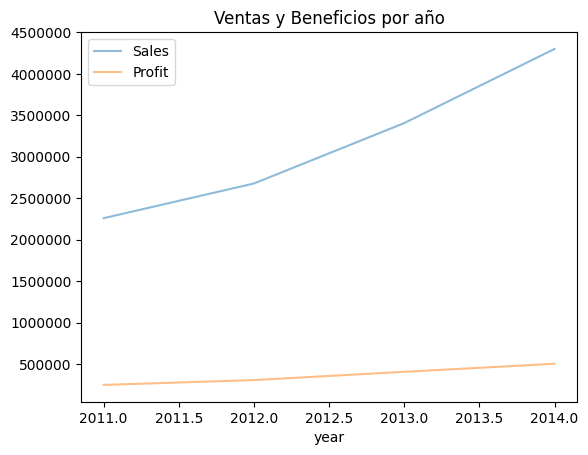

In [51]:
df_sales_per_year = pd.DataFrame({
    'Sales': sales_per_year.values,
    'Profit':profit_per_year.values
}, index=sales_per_year.index)

df_sales_per_year.plot(kind='line', alpha=0.5)
plt.title('Ventas y Beneficios por año')
plt.ticklabel_format(style='plain', axis='y') 

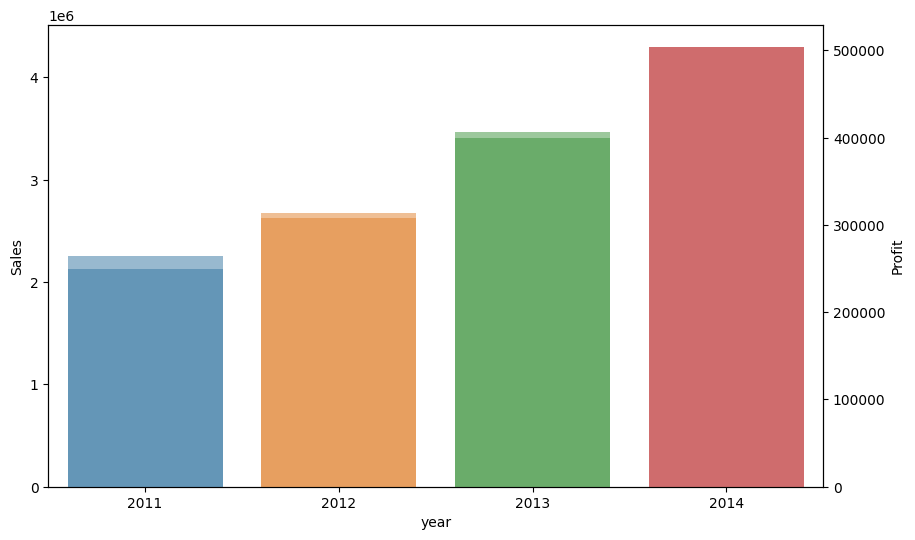

In [43]:
# seaborn
fig, ax1 = plt.subplots(figsize=(10,6))


# barplot para sales_per_year
sns.barplot(x=sales_per_year.index, y=sales_per_year.values, ax= ax1, alpha=0.5)
ax1.set_ylabel('Sales')

# barplot para profit_per_year
ax2 = ax1.twinx()
sns.barplot(x=profit_per_year.index, y=profit_per_year.values, ax=ax2, alpha=0.5)
ax2.set_ylabel('Profit');


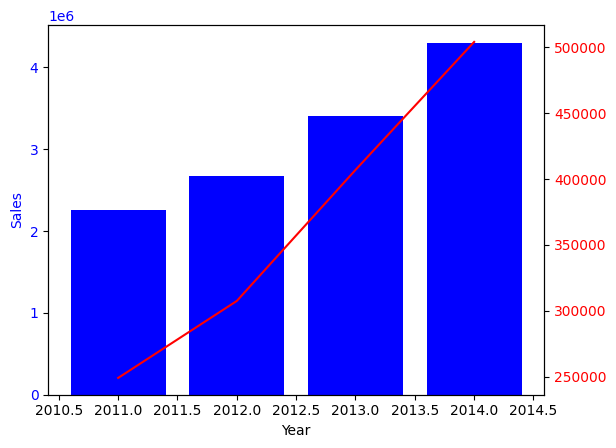

In [54]:
fig, ax1 = plt.subplots()

## sales
color = 'blue'
ax1.set_xlabel('Year')
ax1. set_ylabel('Sales', color=color)
ax1.bar(df_sales_per_year.index, df_sales_per_year['Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'red'
ax2.set_xlabel('Profit', color=color)
ax2.plot(df_sales_per_year.index, df_sales_per_year['Profit'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

## Multivariantes categórico/numérico
### Tabla pivoante

In [56]:
# Tabla pivotante de ventas por año/mes y categoría del producto vendido
df = pd.read_csv('../../dataset/superstore_dataset2011-2015.csv')

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

df_pivot1 = df.pivot_table(index='year', columns='month', values='Sales', aggfunc='sum')
df_pivot1

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,98898.48886,91152.15698,145729.36736,116915.76418,146747.83610,215207.38022,115510.41912,207581.49122,290214.45534,199071.26404,298496.53752,333925.73460
2012,135780.72024,100510.21698,163076.77116,161052.26952,208364.89124,256175.69842,145236.78512,303142.94238,289389.16564,252939.85020,323512.41690,338256.96660
2013,199185.90738,167239.65040,198594.03012,177821.31684,260498.56470,396519.61190,229928.95200,326488.78936,376619.24568,293406.64288,373989.36010,405454.37802
2014,241268.55566,184837.35556,263100.77262,242771.86130,288401.04614,401814.06310,258705.68048,456619.94236,481157.24370,422766.62916,555279.02700,503146.71748


<Axes: xlabel='month', ylabel='year'>

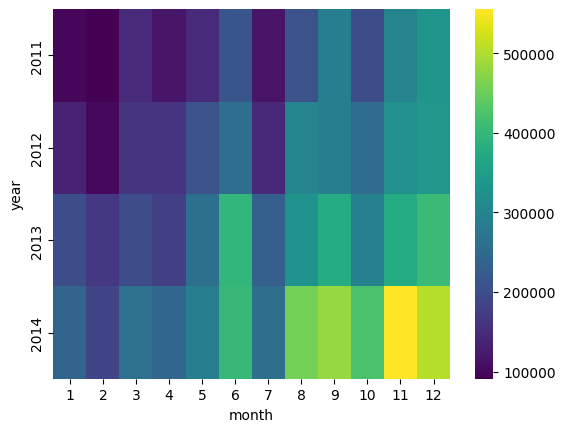

In [57]:
sns.heatmap(df_pivot1, cmap='viridis')

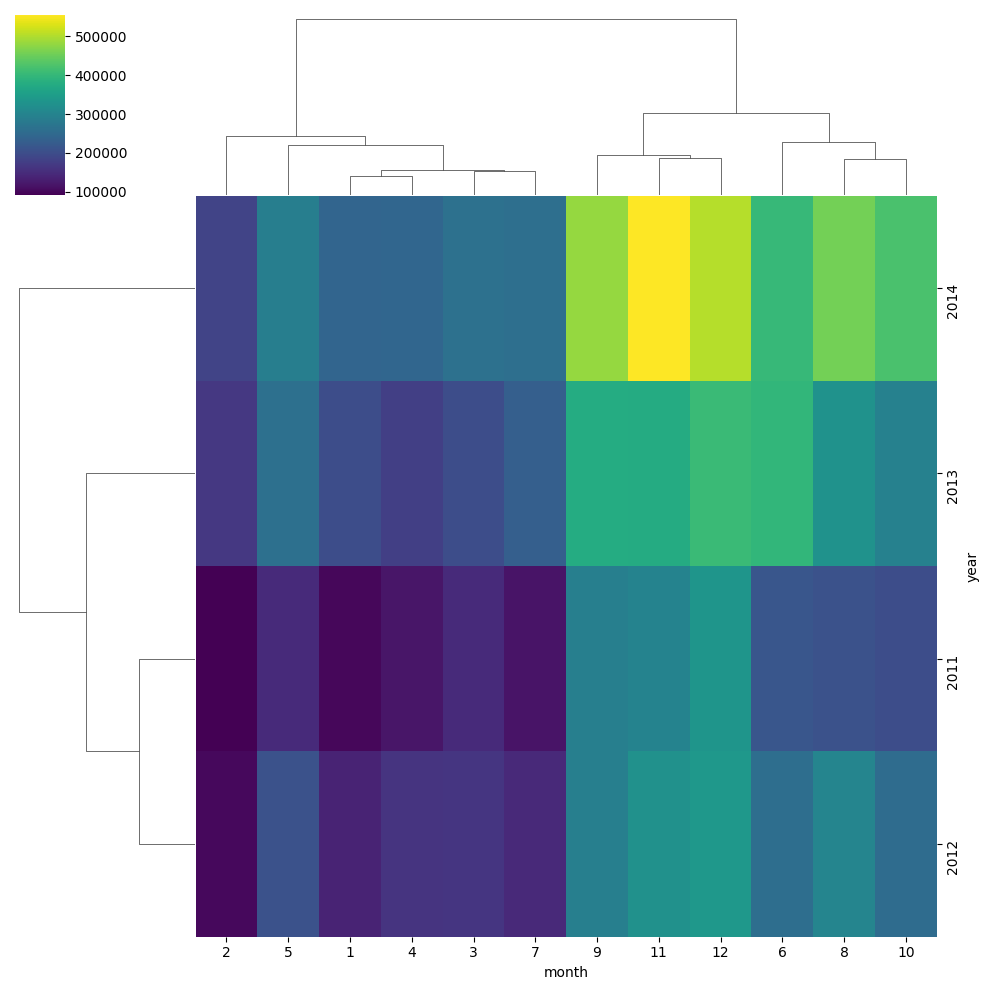

In [58]:
sns.clustermap(df_pivot1, cmap='viridis')

In [60]:
# Tabla pivotante de ventas por Market y Region
df_pivot2 = df.pivot_table(index='Sub-Category', columns='Ship Mode', values='Sales', aggfunc='sum')

df_pivot2

Ship Mode,First Class,Same Day,Second Class,Standard Class
Sub-Category,,,,
Accessories,107200.1580,43798.5024,161814.08090,4.364243e+05
Appliances,158095.1538,64127.2551,229989.42590,5.588525e+05
Art,53197.7708,22057.9911,75227.17880,2.216090e+05
Binders,72584.4794,20520.1381,79604.07040,2.892028e+05
Bookcases,210103.1152,75554.8467,263562.70700,9.173516e+05
Chairs,205831.8882,81402.4324,325472.64940,8.889748e+05
Copiers,218466.9609,82449.6384,295854.70258,9.126650e+05
Envelopes,24291.9314,10206.9508,33680.18800,1.027252e+05
Fasteners,12237.1677,3211.6964,16852.79420,5.094368e+04


<Axes: xlabel='Ship Mode', ylabel='Sub-Category'>

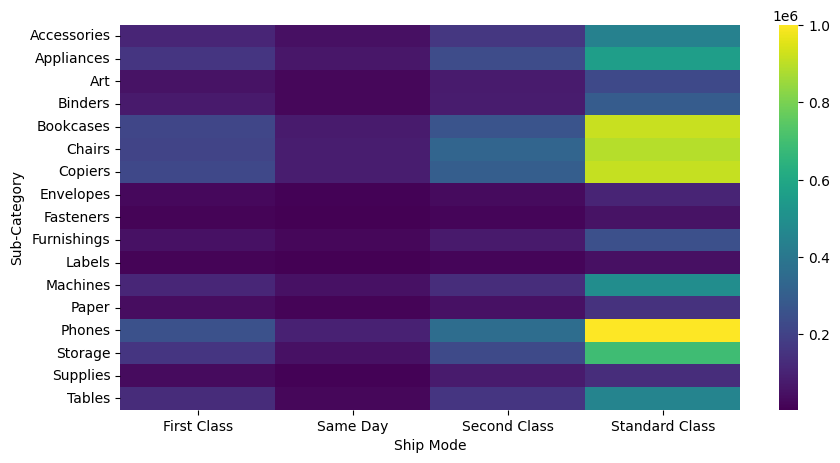

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(df_pivot2, cmap='viridis')